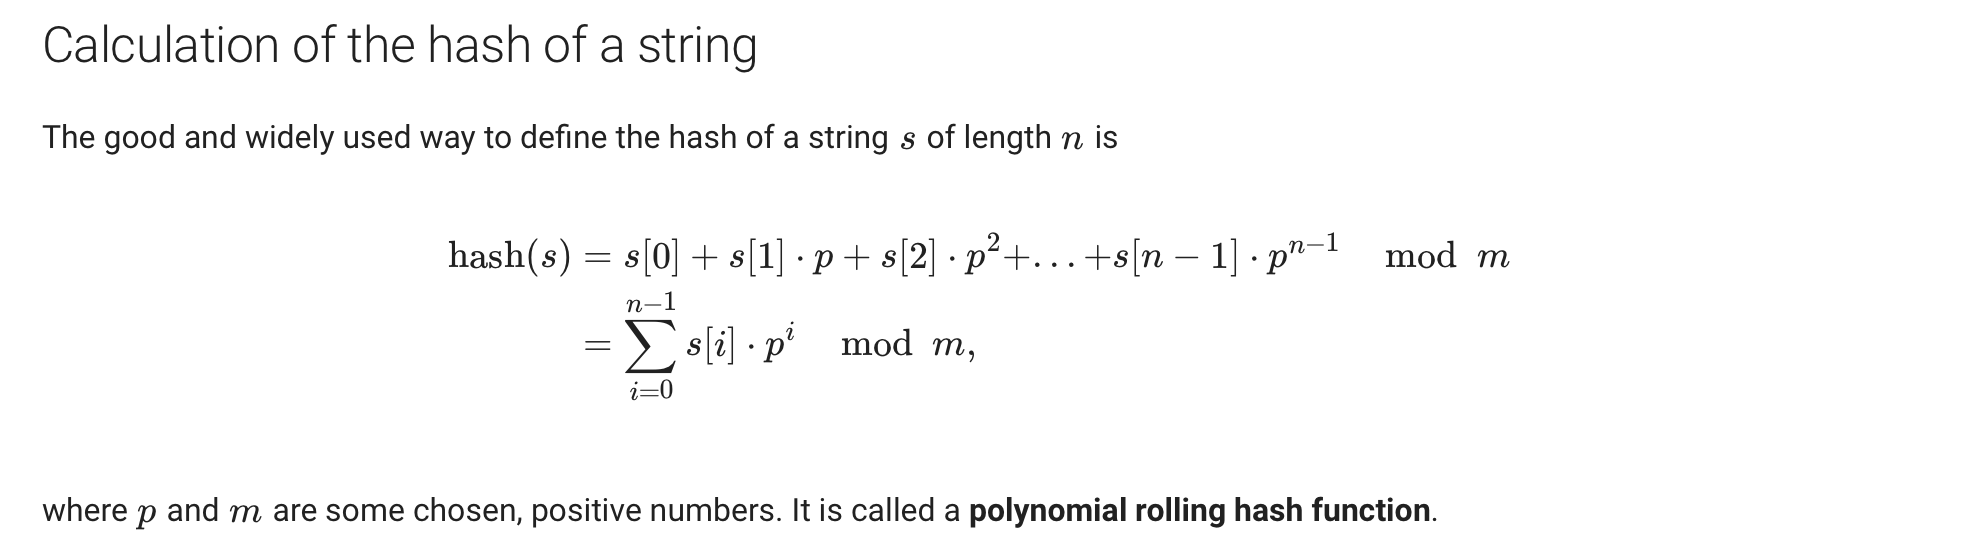

### Choice of p and m

##### p is usually chosen as 31 for strings consisting of lowercase letters only and 53 for both upper and lowercase. m is usually chosen as 10^9 + 9

In [2]:
def compute_hash(s):
    p = 31
    m = 10**9 + 9
    hash_value = 0
    p_pow = 1
    for c in s:
        hash_value = (hash_value + (ord(c) - ord('a') + 1) * p_pow) % m
        p_pow = (p_pow * p) % m
    return hash_value


# Example Uses

![Alt text](image.png)

In [3]:
def find_duplicate_strings(strings):
    hashes = {}
    duplicates = []

    for index, string in enumerate(strings):
        hash_value = compute_hash(string)

        if hash_value in hashes:
            hashes[hash_value].append(index)
        else:
            hashes[hash_value] = [index]
    
    for hash in hashes:
        duplicates.append([strings[i] for i in hashes[hash]])
    return duplicates

strings = ["abc", "def", "abc", "xyz", "def", "pqr"]
duplicate_groups = find_duplicate_strings(strings)
print(duplicate_groups)

[['abc', 'abc'], ['def', 'def'], ['xyz'], ['pqr']]


![Alt text](image-2.png)

![Alt text](image-1.png)

In [24]:
def count_unique_substrings(s):
    n = len(s)  # Length of the input string

    # Constants for the hash function
    p = 31
    m = 10**9 + 9

    # Initialize an array to store powers of p modulo m
    p_pow = [1] * n
    for i in range(1, n):
        p_pow[i] = (p_pow[i - 1] * p) % m

    # Initialize an array to store the hash values of prefixes
    prefix_hashes = [0] * (n + 1)
    for i in range(n):
        # Calculate the hash values of prefixes using a rolling hash
        prefix_hashes[i + 1] = (prefix_hashes[i] + (ord(s[i]) - ord('a') + 1) * p_pow[i]) % m

    # Initialize a variable to count unique substrings
    count = 0

    # Iterate over all possible substring lengths
    for substring_length in range(1, n + 1):
        # Use a set to store distinct substring hashes
        
        unique_hashes = set()

        # Iterate through the string to compute substring hashes
        for i in range(n - substring_length + 1):
            # Calculate the hash value of the current substring
            print( s[i:i+substring_length])
            substring_hash = (prefix_hashes[i + substring_length]  - prefix_hashes[i]) % m

            # Multiply by the appropriate power of p
            substring_hash = (substring_hash * p_pow[n - i - 1]) % m

            # Insert the hash value into the set
            unique_hashes.add(substring_hash)

        # Update the count with the number of distinct substrings of the current length
        count += len(unique_hashes)

    # Return the total count of distinct substrings
    return count


input_string = "ababa"

result = count_unique_substrings(input_string)
print(f"The number of different substrings in '{input_string}' is: {result}")


a
b
a
b
a
ab
ba
ab
ba
aba
bab
aba
abab
baba
ababa
The number of different substrings in 'ababa' is: 9


In [23]:
def count_unique_substrings(string):
    n, p, m=len(string), 31, 10**9 + 9

    p_pow = [1] * (n)

    for i in range(1,n):
        p_pow[i] = (p_pow[i-1] * p) % m
    
    prefix_hashes = [0] * ( n+1 )

    for i, char in enumerate(string):
        prefix_hashes[i + 1] = (prefix_hashes[i] + (ord(char) - ord('a') - 1) * p_pow[i]) % m

    count = 0

    for i in range(1,n+1):
        uniques = set()

        for j in range(n - i + 1):
            substr = string[j:i+j]
            print(substr)

            hash_val = (prefix_hashes[i+j] - prefix_hashes[j]) % m

            hash_val = (hash_val * p_pow[n - j - 1] ) % m

            uniques.add(hash_val)
        count+=len(uniques)
    return count
print(count_unique_substrings('ababa'))

a
b
a
b
a
ab
ba
ab
ba
aba
bab
aba
abab
baba
ababa
9
